<a href="https://colab.research.google.com/github/DiwakarBasnet/Machine-Learning/blob/main/Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Lienar Regression

Simple linear regression model to study relationship between sales and advertising dataset for dietary weight control product. In this project ther is one independent or input variable; Sales data and is denoted by X. Similarly, there is on dependent or output variable; Advertising data denoted by y. The linear relationship can be modelled by mathematical equation of the form:-

\begin{align}
  \mathbf{y} = B_0 + B_1*X
\end{align}

Slope of line is given by $B_1$ and intercept by $B_0$. In SLR model, we want to fit a line which estimates the linear relationship between $X$ and $y$. We can draw a scatter plot between $X$ and $y$ which shows the relationship between them.

Now, our task is to find a line which best fits the scatter plot. This line is called **Regression line**.

We can define an error function for any line. The regression line is made such that error function is minimized, this error function is also called **Cost function**.

## Cost Function

We want the regression line to be close to actual data points as much as possible. It can be achieved by minimizing the vertical distance **(residual)** between the actual data point and fitted line.

So, in a regression model, we try to minimize the residuals. We could try to do this by minimizing the sum of residuals, but then a large positive residual would cancel out a large negative residual. For this reason, we minimize the sum of the squares of the residuals.

Let yi be actual data point and yi' is predicted data point. So, the residual for data point would be given as;

\begin{align}
    \mathbf{d_i} = y_i - y_i'
\end{align}

Sum of the squares of the residuals is given as:

\begin{align}
  \mathbf{D} = \sum_{i=1}^n d_i^2
\end{align}

This cost function denotes the total error present in the model which is the sum of the total errors of each individual data point.

We can estimate the parameters of the model $B_0$ and $B_1$ by minimizing the error in the model by minimizing $D$. Thus we can find the regression line.

This method of finding the parameters of the model and thus regression line is called **Ordinary Least Square Method**.


# Data Preprocessing

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## About the dataset
The dataset has been imported from the econometrics website with followind url:

http://www.econometrics.com/intro/sales.htm

The dataset contains sales and advertising expenditures for a dietary weight control product. It contains monthly data for 36 months. The variables in the dataset are Sales and Advertising.

In [2]:
# Getting the dataset
url = 'https://raw.githubusercontent.com/DiwakarBasnet/Machine-Learning/main/chapter-02-supervised-learning/dataset/SALES.csv?token=GHSAT0AAAAAABYAO27LP324YMEFT6JDHQVEYZMLNNA'
df = pd.read_csv(url, header=None)

In [3]:
# view dimension of df
df.shape

(36, 2)

In [4]:
# view top 5 rows of df
df.head()

,0,1
0,12.0,15
1,20.5,16
2,21.0,18
3,15.5,27
4,15.3,21


In [5]:
# Rename columns of df dataframe
df.columns = ['Sales', 'Advertising']
df = df.astype({'Advertising': float})

In [6]:
# View dataframe summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        36 non-null     float64
 1   Advertising  36 non-null     float64
dtypes: float64(2)
memory usage: 704.0 bytes


In [7]:
# View descriptive statistics
df.describe()

,Sales,Advertising
count,36.000000,36.000000
mean,24.255556,28.527778
std,6.185118,18.777625
min,12.000000,1.000000
25%,20.300000,15.750000
50%,24.250000,23.000000
75%,28.600000,41.000000
max,36.500000,65.000000


In [8]:
# Declare feature variable and target vatiable
X = df['Sales'].values        # feature variable
y = df['Advertising'].values  # target variable

# values attribute of pandas dataframe returns the numpy array

## Visual exploratory data analysis
Visualize the relationship between X and y by using scatter plot.

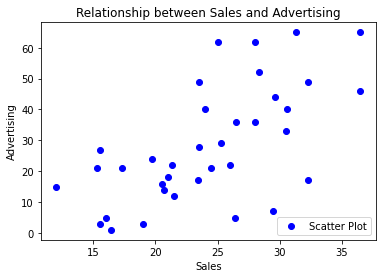

In [9]:
# Scatterplot
plt.scatter(X, y, color='blue', label='Scatter Plot')
plt.title("Relationship between Sales and Advertising")
plt.xlabel("Sales")
plt.ylabel("Advertising")
plt.legend(loc=4)
plt.show()

In [10]:
# Checking dimensions of X and y to make sure they are in right format for Scikit-Learn API
print(X.shape)
print(y.shape)

(36,)
(36,)


## Reshaping X and y
Since we are working with only one feature variable, so we need to reshape using Numpy reshape() method.

It specifies first dimension to be -1, which means "unspecified".

In [11]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)
print(X.shape)
print(y.shape)

(36, 1)
(36, 1)


## Train test split
test_size = 0.33 means the test dataset is of (0.33 * dataset) size and train dataset is of (0.77 * dataset) size.

Everytime we run train_test_split without random_state, we will get different result i.e on using random_state equals some int number, our split will always be same.

We are using '42' because of this (from wikipedia): The number 42 is, in The Hitchhiker's Guide to the Galaxy by Douglas Adams, the "Answer to the Ultimate Question of Life, the Universe, and Everything"

In [12]:
# Split X and y into training and test data sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(24, 1)
(12, 1)
(24, 1)
(12, 1)


## Mechanics of model
Instantiate the linear regressor (lm) and fit it on the training set using fit method. In this step, the model learned the relationship between the training data (X_train, y_train).

Now, the model is ready to make predictions on test data (X_test). Prediction on test data is made using predict method.

In [14]:
# Instantiate the linear regression object lm

from sklearn.linear_model import LinearRegression
lm = LinearRegression()

# Train the model using training dataset
lm.fit(X_train, y_train)

# Predict on test dataset
y_pred = lm.predict(X_test)

## Model slope and intercept
The model slope is given by lm.coef and model intercept is given by lm.intercept. The estimated model slope and intercept values are 1.60509347 and -11.16003616.

So, the equation of the fitted regression line is;

y = (1.60509347 * x) - 11.16003616

In [15]:
# Compute model slope and intercept
a = lm.coef_
b = lm.intercept_
print("Estimated model slope, a: ",a) 
print("Estimated model intercept, b: ",b)

Estimated model slope, a:  [[1.60509347]]
Estimated model intercept, b:  [-11.16003616]


# Regression metrics for model performance
For regression problems, there are two ways to compute the model performance. They are RMSE (Root Mean Square Error) and R-Squared value.

## RMSE
RMSE is the standard deviation (measure of variation or dispersion of a set of values) of the residuals. It can be calculated by taking square root of Mean Squared Error. It gives us how spread the residuals are, given by the standard deviation of the residuals. Lower values of RMSE indicate better fit of data.

In [16]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE: {:.4f}".format(rmse))

RMSE: 11.2273


## $R^2$ Score
It is another metric to evaluate performance of a regression model. It is also called coefficient of determination. It gives us an idea of goodness of fit for the linear regression models. It indicates the percentage of variance that is explained by the model.

Mathematically,

$R^2$ Score = Explained Variation / Total Variation

In general, the higher the $R^2$ Score value, the better the model fits the data. Usually, it's value ranges from 0 to 1. So, we want its value to be as close to 1. It's value can become negative if out model is wrong.

In business decisions, the benchmark for the $R^2$ score value is 0.7 i.e if $R^2$ score value >= 0.7, then the model is good enough to deploy on unseen data whereas if $R^2$ score value < 0.7, then the model is not good enough to deploy.

In [17]:
from sklearn.metrics import r2_score
r2s = r2_score(y_test, y_pred)
print("R2 Score: {:.4f}".format(r2s))

R2 Score: 0.5789


# Interpretation and conclusion
The RMSE value was found to be 11.2273, which means sometimes we expect the predictions to be off by more than 11.2273 and other times we expect less than 11.2273. So, the model is not good fit to the data.

The $R^2$ score value was found to be 0.5789 ( < 0.7). It means that this model explains 57.89% of the variance in our dependent variable. So, the $R^2$ score value confirms that the model is not good enough to deploy because it does not provide good fit to the data.

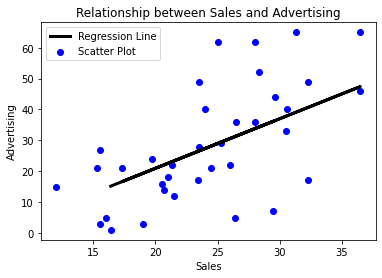

In [18]:
# Plot the Regression Line
plt.scatter(X, y, color='blue', label='Scatter Plot')
plt.plot(X_test, y_pred, color='black', linewidth=3, label='Regression Line')
plt.title('Relationship between Sales and Advertising')
plt.xlabel("Sales")
plt.ylabel("Advertising")
plt.legend(loc=0)
plt.show()

# Residual analysis
A linear regression model may not represent the data appropriately. The model may be a poor fit to the data. So, we should validate our model by defining and examining residual plots.

The difference between the observed value of the dependent variable ($y_i$) and the predicted value ($y_i'$) is called the residual and is denoted by e. The scatter-plot of these residuals is called residual plot.

If the data points in a residual plot are randomly dispersed around horizontal axis and an approximate zero residual mean, a linear regression model may be appropriate for the data. Otherwise a non-linear model may be more appropriate.

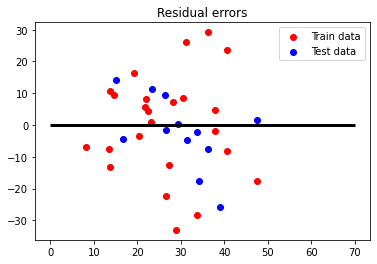

In [19]:
# Plotting residual errors
plt.scatter(lm.predict(X_train), lm.predict(X_train) - y_train, color='red', label='Train data')
plt.scatter(lm.predict(X_test), lm.predict(X_test) - y_test, color='blue', label='Test data')
plt.hlines(xmin = 0, xmax = 70, y = 0, linewidth = 3)
plt.title('Residual errors')
plt.legend(loc = 0)
plt.show()

# Checking for overfitting and underfitting
The training set score is calculated as 0.2861. Similarly, the test set score is calculated as 0.5789. The training set score is very poor, so the model does not learn the relationships appropriately from the training data. It is a clear sign of underfitting. This problem can be improved by increasing model complexity. 

In [20]:
# Checking for Overfitting and Underfitting
print("Training set score: {:.4f}".format(lm.score(X_train, y_train)))
print("Test set score: {:.4f}".format(lm.score(X_test, y_test)))

Training set score: 0.2861
Test set score: 0.5789


In [22]:
# Save model for future use
import joblib
joblib.dump(lm, 'lm_regressor.pkl')

# To load the model
# lm2 = joblib.load('lm_regressor.pkl')

['lm_regressor.pkl']